<a href="https://colab.research.google.com/github/Daksaweaomegg10/AI_ML/blob/main/Projects/Project_6_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Wine data
2. Data Analysis
3. Data prePorcessing
4. Train-test Split
5. Random Forest Model(Supervised Algorithm)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading dataset to a pandas dataframe
wined = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wined.shape

(1599, 12)

In [ ]:
wined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking for missing values
wined.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# data analysis and visualization
wined.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wined['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


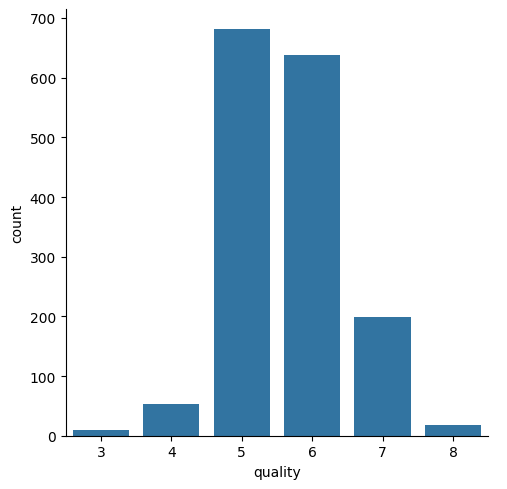

In [ ]:
#number of values for each quality
sns.catplot(x='quality',data=wined,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

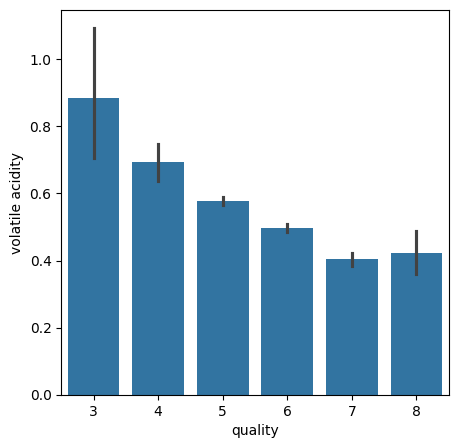

In [ ]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wined)


Hence we can see that volatile acidity inversely to quality

<Axes: xlabel='quality', ylabel='citric acid'>

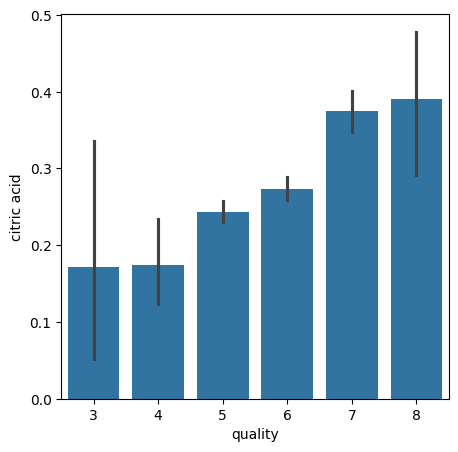

In [ ]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wined)


<Axes: xlabel='volatile acidity', ylabel='citric acid'>

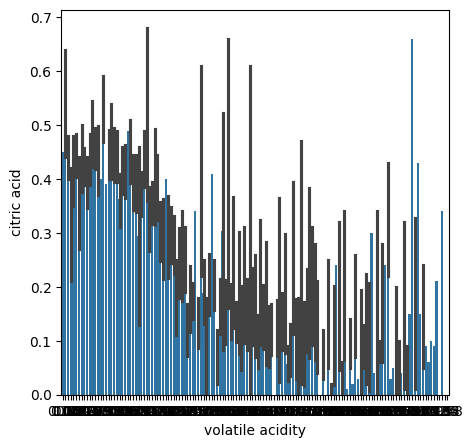

In [ ]:
#citric acid vs volatile acidity
plot=plt.figure(figsize=(5,5))
sns.barplot(x='volatile acidity',y='citric acid',data=wined)


In [ ]:
# correlation
correlation=wined.corr()

<Axes: >

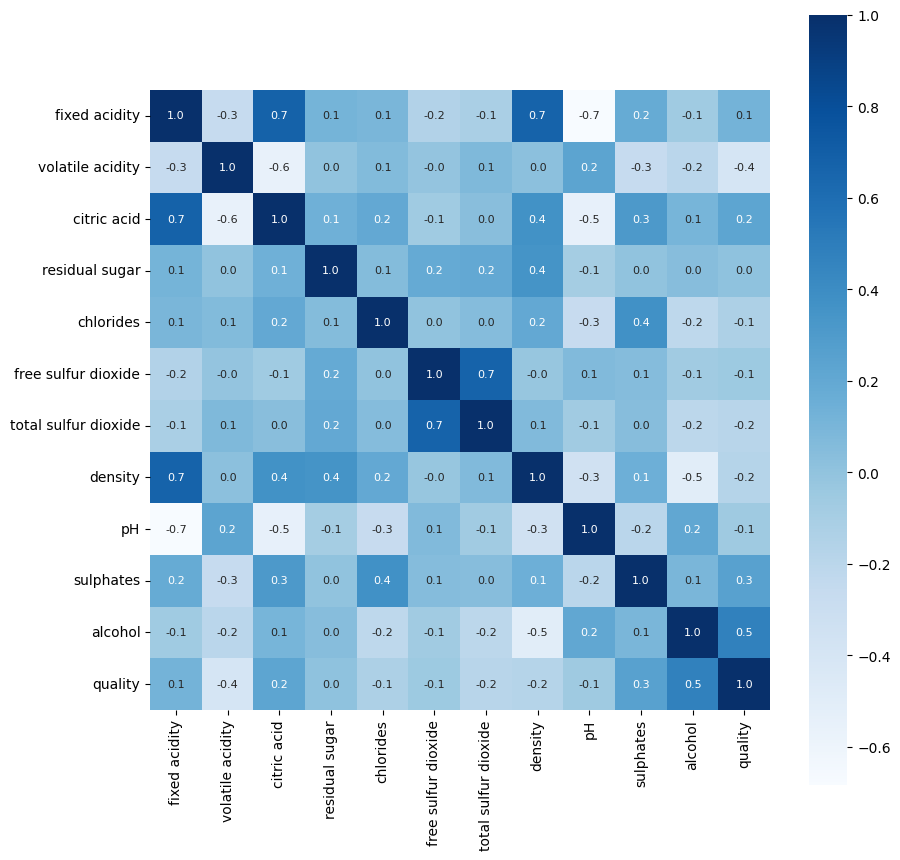

In [ ]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [ ]:
#Seprating label and quality column
x=wined.drop('quality',axis=1)
y=wined['quality'].apply(lambda y_value:1 if y_value>=7 else 0)


In [ ]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#label binarisation 0 or 1
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
# train and test test size of 20 5
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
# Model training
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('Accuracy ',test_data_accuracy)

Accuracy  0.934375


In [ ]:
# building a predictive system
input_data=(7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8)
# to numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshape the numpy array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
